<a href="https://colab.research.google.com/github/emin-ozturk/Python-ML/blob/main/M%C3%BC%C5%9Fteri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Python_Programming_for_Data_Science/Alıştırmalar/Müşteri Analizi"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python_Programming_for_Data_Science/Alıştırmalar/Müşteri Analizi
 Mall_Customers.csv  'Müşteri Analizi.ipynb'


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.drop(["CustomerID"], axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Yeni Kolon Ekleme

In [68]:
score_desc = df["Spending Score (1-100)"].describe()
print(score_desc)

score_25 = score_desc["25%"]
score_75 = score_desc["75%"]

print(score_25)
print(score_75)

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
34.75
73.0


In [69]:
def spending_score_cat(row):
  if row > score_75:
    return "High"
  elif row > score_25:
    return "Normal"
  else:
    return "Low"

df["Spending Score Cat"] = [spending_score_cat(row) for row in df["Spending Score (1-100)"]]

In [70]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Cat
0,Male,19,15,39,Normal
1,Male,21,15,81,High
2,Female,20,16,6,Low
3,Female,23,16,77,High
4,Female,31,17,40,Normal


# Görselleştirme

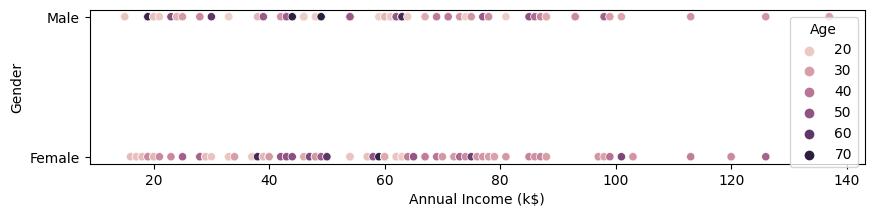

In [71]:
plt.figure(figsize = (10, 2))
sns.scatterplot(x = "Annual Income (k$)", y = "Gender", hue = "Age", data = df)
plt.show()

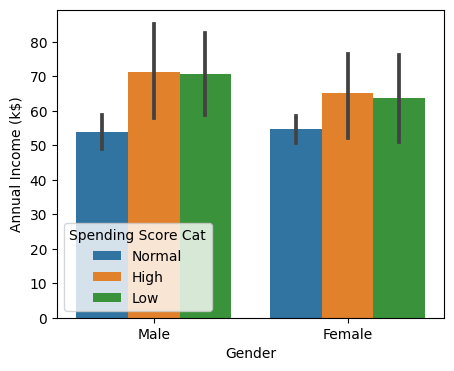

In [76]:
plt.figure(figsize = (5, 4))
sns.barplot(x = "Gender", y = "Annual Income (k$)", hue = "Spending Score Cat", data = df)
plt.show()

In [77]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Cat
0,Male,19,15,39,Normal
1,Male,21,15,81,High
2,Female,20,16,6,Low
3,Female,23,16,77,High
4,Female,31,17,40,Normal


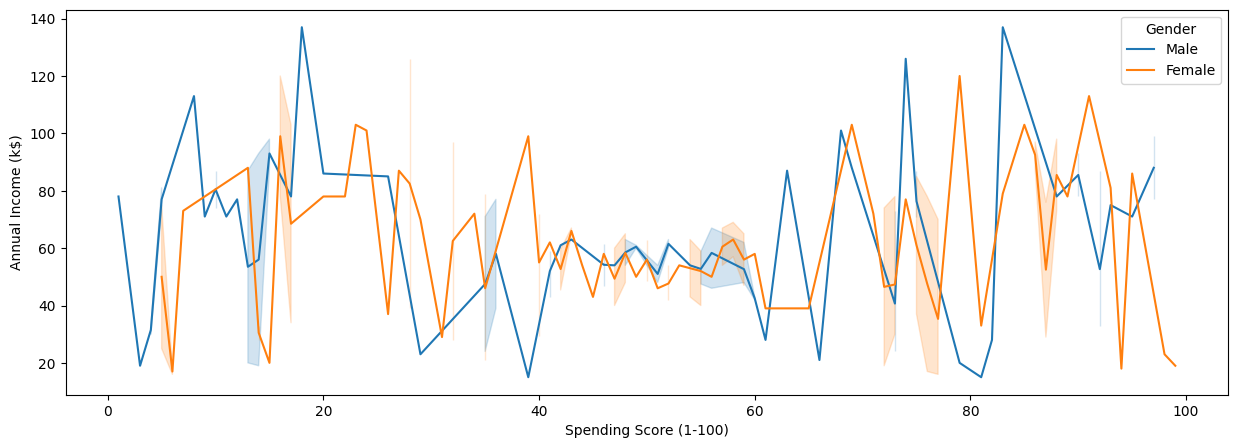

In [87]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = "Gender", data = df)
plt.show()

# Makine Öğrenmesi

In [88]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Cat
0,Male,19,15,39,Normal
1,Male,21,15,81,High
2,Female,20,16,6,Low
3,Female,23,16,77,High
4,Female,31,17,40,Normal


In [91]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 2})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Cat
0,1,19,15,39,Normal
1,1,21,15,81,High
2,2,20,16,6,Low
3,2,23,16,77,High
4,2,31,17,40,Normal


In [95]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [129]:
print("---------------KNeighborsClassifier---------------")
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

print("---------------LogisticRegression---------------")
knn = LogisticRegression(max_iter = 500)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

print("---------------RandomForestClassifier---------------")
knn = RandomForestClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


print("---------------SVC---------------")
knn = SVC()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

---------------KNeighborsClassifier---------------
Accuracy: 0.9
              precision    recall  f1-score   support

        High       0.70      1.00      0.82         7
         Low       1.00      0.89      0.94         9
      Normal       0.95      0.88      0.91        24

    accuracy                           0.90        40
   macro avg       0.88      0.92      0.89        40
weighted avg       0.92      0.90      0.90        40

---------------LogisticRegression---------------
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         9
      Normal       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

---------------RandomForestClassifier---------------
Accuracy: 0.975
              precision    recall  f1-sco